<a href="https://colab.research.google.com/github/Ayush260603/Stock_price_predictor/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
import yfinance as yf

In [2]:
start="2012-01-01"
end="2024-12-26"
stock="GOOG"
data=yf.download(stock,start,end)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2012-01-03,16.513794,16.573130,16.641375,16.248346,16.262545,147611217
2012-01-04,16.585020,16.644611,16.693678,16.453827,16.563665,114989399
2012-01-05,16.354961,16.413727,16.537264,16.344486,16.491436,131808205
2012-01-06,16.131853,16.189817,16.438385,16.184088,16.417213,108119746
2012-01-09,15.447884,15.503389,16.114599,15.472754,16.102144,233776981


In [3]:
data.reset_index(inplace=True)

In [4]:
data.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04,16.585020,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05,16.354961,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06,16.131853,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09,15.447884,15.503389,16.114599,15.472754,16.102144,233776981


In [5]:
ma_100_days=data.Close.rolling(100).mean()

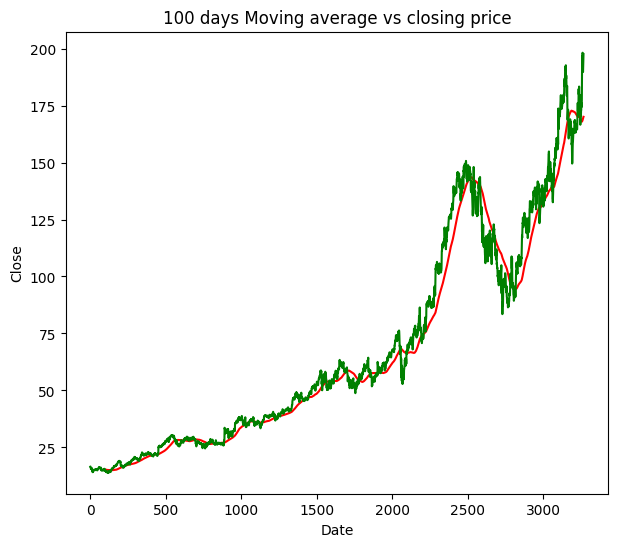

In [6]:
plt.figure(figsize=(7,6))
plt.title("100 days Moving average vs closing price")
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

In [7]:
ma_200_days=data.Close.rolling(200).mean()

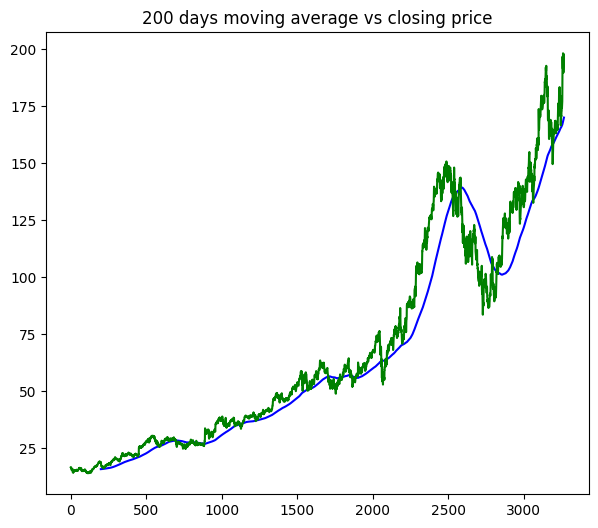

In [8]:
plt.figure(figsize=(7,6))
plt.title("200 days moving average vs closing price")
plt.plot(ma_200_days,"b")
plt.plot(data.Close,"g")
plt.show()

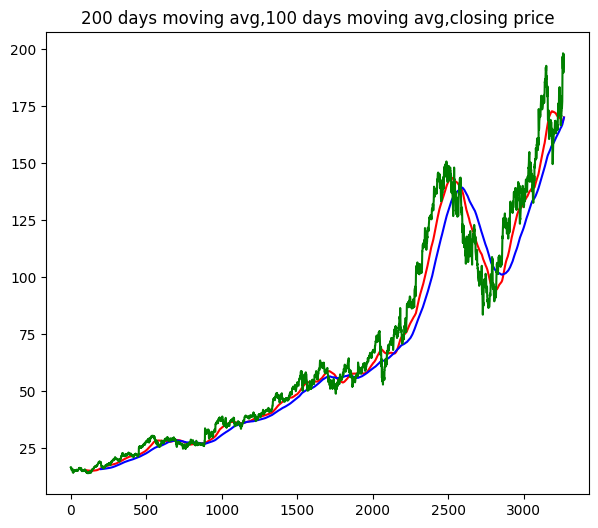

In [9]:
plt.figure(figsize=(7,6))
plt.title("200 days moving avg,100 days moving avg,closing price")
plt.plot(ma_100_days,"r")
plt.plot(ma_200_days,"b")
plt.plot(data.Close,"g")
plt.show()

In [10]:
data.isnull()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3261,False,False,False,False,False,False,False
3262,False,False,False,False,False,False,False
3263,False,False,False,False,False,False,False


In [11]:
data.dropna(inplace=True)

In [12]:
train_data=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
test_data=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [13]:
train_data.shape[0]

2612

In [32]:
print(test_data.shape[0])
# test_data.head()

654


In [17]:
#scaling the dataset
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))

In [31]:
scaled_train_data=Scaler.fit_transform(train_data)
# print(train_data)
# print(scaled_train_data)

In [19]:
#we will use 100 days data to predict 101th record
x=[]
y=[]
for i in range(100,scaled_train_data.shape[0]):
    x.append(scaled_train_data[i-100:i])
    y.append(scaled_train_data[i,0])

In [20]:
x,y=np.array(x),np.array(y)

**MODEL CREATION**

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model=Sequential()
model.add(LSTM(units=50,activation='relu', return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [33]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 280ms/step - loss: 0.0052
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - loss: 0.0051
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 305ms/step - loss: 0.0040
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 301ms/step - loss: 0.0043
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - loss: 0.0044
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 305ms/step - loss: 0.0038
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - loss: 0.0039
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - loss: 0.0033
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 297ms/step - loss: 0.0029
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 280ms/step - loss: 0.0035
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 282ms/step - loss: 0.0034
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 304ms/step - loss: 0.0029
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 279ms/step - loss: 0.0033
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 291ms/step - loss: 0.0029
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [35]:
past_100_days_data=train_data.tail(100)

In [36]:
test_data=pd.concat([past_100_days_data,test_data],ignore_index=True)

In [37]:
test_data

Ticker,GOOG
0,148.063995
1,146.447998
2,146.504501
3,146.002502
4,144.679504
...,...
749,190.149994
750,189.699997
751,192.960007
752,195.990005


In [39]:
scaled_test_data=Scaler.fit_transform(test_data)

In [40]:
x=[]
y=[]
for i in range(100,scaled_test_data.shape[0]):
    x.append(scaled_test_data[i-100:i])
    y.append(scaled_test_data[i,0])

In [42]:
y_predict=model.predict(np.array(x))

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step


In [43]:
y_predict

array([[0.27461883],
       [0.27206576],
       [0.26938397],
       [0.2665922 ],
       [0.2636723 ],
       [0.26064298],
       [0.25760317],
       [0.2546371 ],
       [0.25185776],
       [0.24933428],
       [0.24711573],
       [0.24523708],
       [0.24366872],
       [0.24240476],
       [0.24144974],
       [0.24078958],
       [0.24039613],
       [0.2401809 ],
       [0.24004997],
       [0.23993461],
       [0.23976676],
       [0.23950669],
       [0.2391548 ],
       [0.23872852],
       [0.23825684],
       [0.23779617],
       [0.23739514],
       [0.2370838 ],
       [0.23687029],
       [0.2367415 ],
       [0.2366703 ],
       [0.23664448],
       [0.23666309],
       [0.23675016],
       [0.2369369 ],
       [0.23723818],
       [0.23766528],
       [0.2382003 ],
       [0.23879181],
       [0.2393709 ],
       [0.23987572],
       [0.24028665],
       [0.24060088],
       [0.24083276],
       [0.2409677 ],
       [0.24098672],
       [0.24086607],
       [0.240

In [47]:
Scale=1/Scaler.scale_

In [49]:
y_predict=y_predict*Scale

In [48]:
y=y*Scale

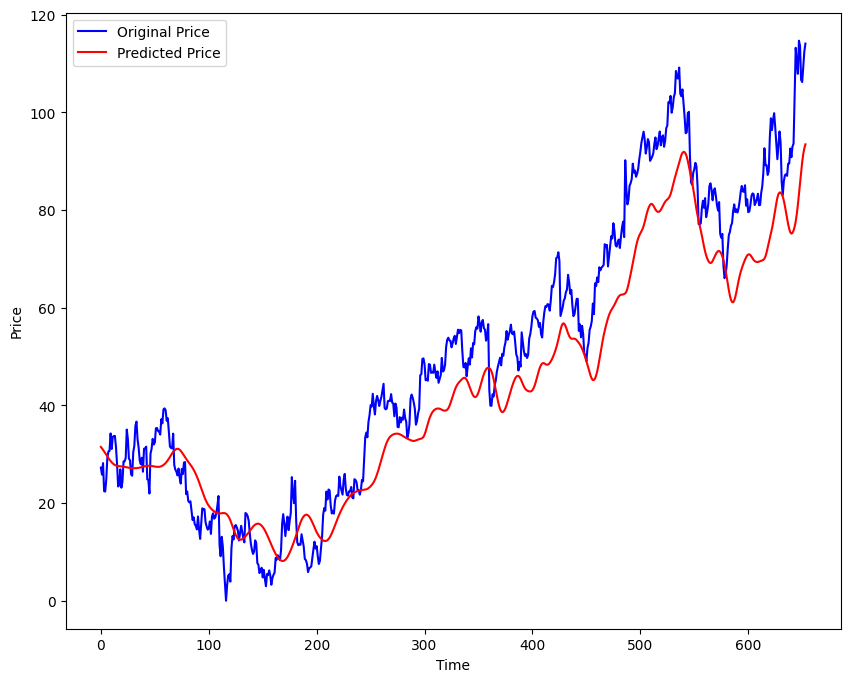

In [51]:
plt.figure(figsize=(10,8))
plt.plot(y,"b",label="Original Price")
plt.plot(y_predict,"r",label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [52]:
model.save('Stock price prediction.keras')